<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Kears_Tensorflow_Theano_PyTorch_Cntk(Microsoft_Cognitive_Toolkit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Keras**

Keras is an open-source library that provides a Python interface for artificial neural networks. Keras was first independent software, then integrated into the TensorFlow library, and later supporting more.

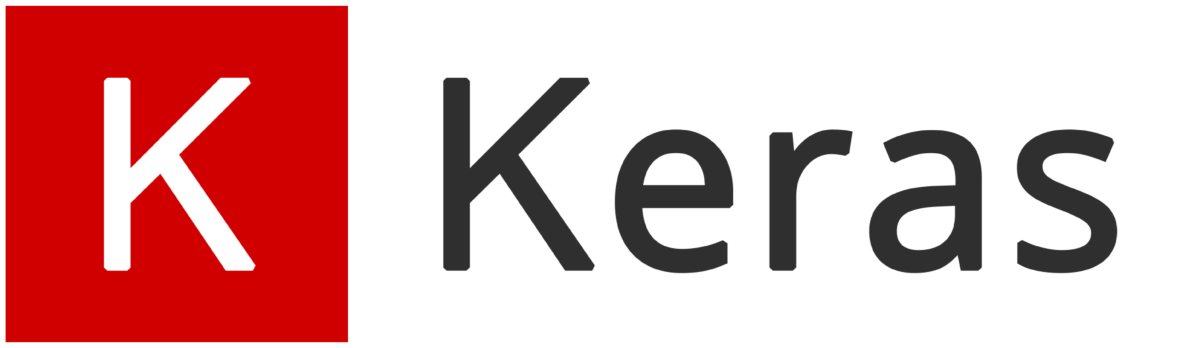

# **TensorFlow**
 is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks

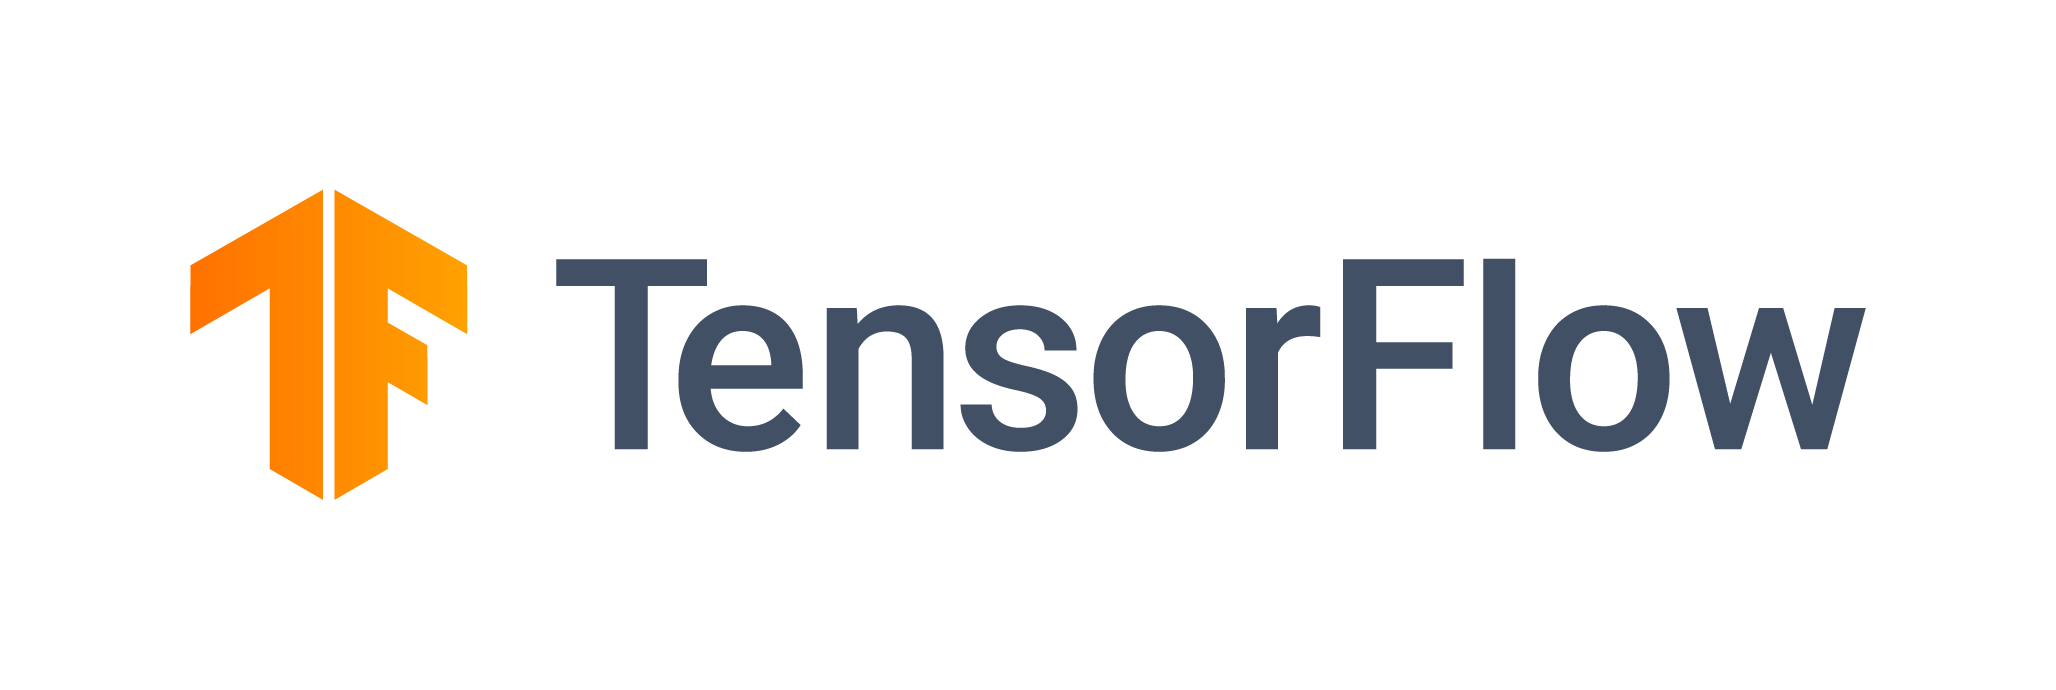

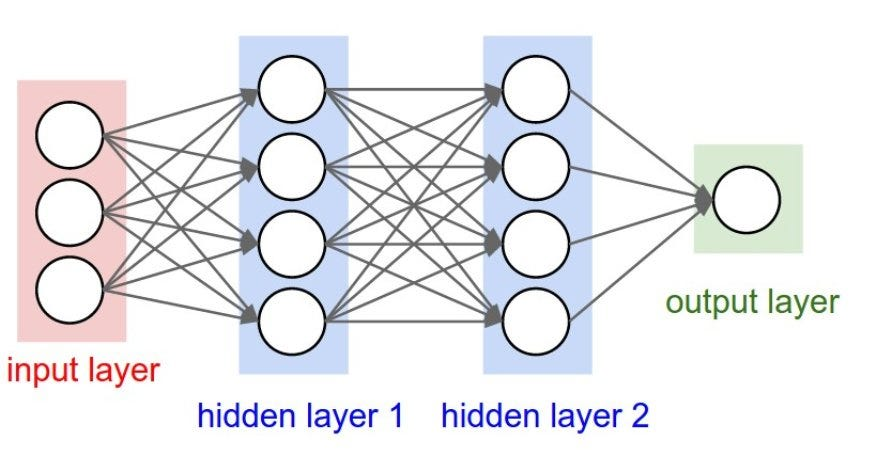

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.2984 - loss: 1.8732 - val_accuracy: 0.5198 - val_loss: 1.3258
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.5435 - loss: 1.2790 - val_accuracy: 0.5891 - val_loss: 1.1436
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - accuracy: 0.6113 - loss: 1.1033 - val_accuracy: 0.6207 - val_loss: 1.0735
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.6491 - loss: 0.9950 - val_accuracy: 0.6435 - val_loss: 1.0232
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 98ms/step - accuracy: 0.6782 - loss: 0.9180 - val_accuracy: 0.6712 - val_loss: 0.9342
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.7059 - loss: 0.8500 - val_accuracy: 0.6929 - val_loss: 0.8857
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - accuracy: 0.7194 - loss: 0.8002 - val_accuracy: 0.6696 - val_loss: 0.9447
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 107ms/step - accuracy: 0.7289 - loss: 0.7683 

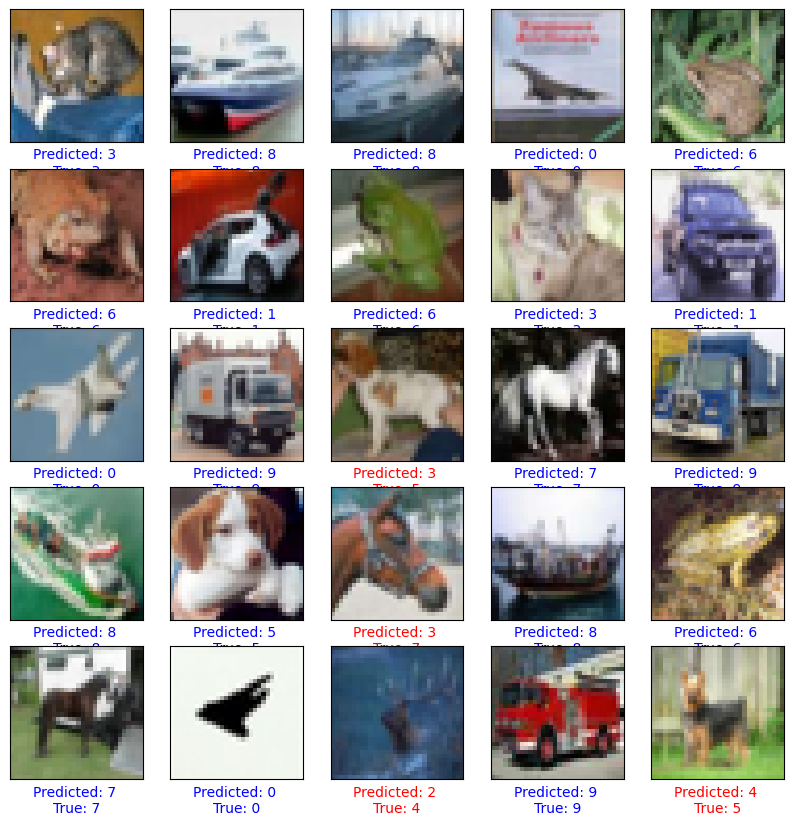

In [2]:
# prompt: cnn image classification using keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions
predictions = model.predict(x_test)

# Plot some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    plt.xlabel("Predicted: {} \nTrue: {}".format(predicted_label, true_label), color=color)
plt.show()